# Day 1

### Part 1


In [2]:
import com.psyndicate.aoc.parseIntegers
import com.psyndicate.aoc.readResourceAsText
import com.psyndicate.aoc.toPair
import com.psyndicate.aoc.unzip
import kotlin.test.assertEquals

val testInput =
    """
    3   4
    4   3
    2   5
    1   3
    3   9
    3   3
    """.trimIndent()

fun calculatePart1(input: String): Int {
    val (a, b) = input.split('\n').unzip { it.parseIntegers().take(2).toPair() }
    return a.sorted().zip(b.sorted()) { a, b -> abs(a - b) }.sum()
}

val testInputResult = calculatePart1(testInput)
println("Test Part 1: ${testInputResult}")
assertEquals(11, testInputResult)

val puzzleInput = readResourceAsText("/day1/input.txt")
val part1Result = calculatePart1(puzzleInput)
println("Part 1: ${part1Result}")
assertEquals(2742123, part1Result)


Test Part 1: 11
Part 1: 2742123


### Part 2

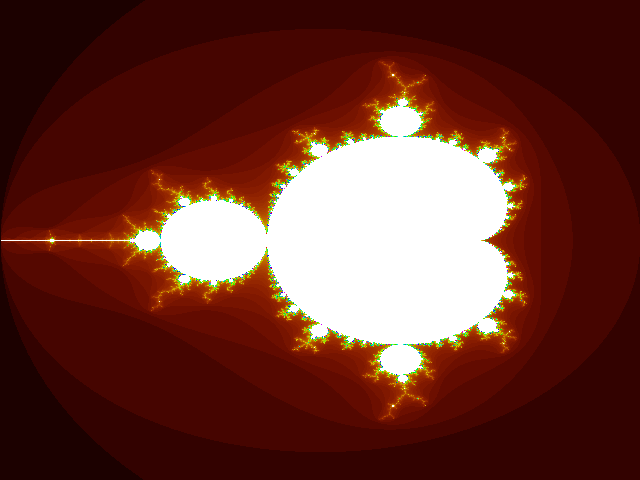

In [3]:
import com.psyndicate.aoc.bitmap

val maxIterations = 1000
val xMin = -2.0
val xMax = 1.0
val yMin = -1.5
val yMax = 1.5

bitmap { width, height ->
    for (y in 0 until height) {
        val cy = yMin + y * (yMax - yMin) / height
        for (x in 0 until width) {
            val cx = xMin + x * (xMax - xMin) / width
            var zx = 0.0
            var zy = 0.0
            var iteration = 0

            while (zx * zx + zy * zy < 4.0 && iteration < maxIterations) {
                val temp = zx * zx - zy * zy + cx
                zy = 2.0 * zx * zy + cy
                zx = temp
                iteration++
            }

            val color = if (iteration < maxIterations) {
                java.awt.Color.HSBtoRGB(iteration / 256f, 1f, iteration / (iteration + 8f))
            } else {
                0 // Black for points inside the Mandelbrot set
            }
            this.setRGB(x, y, color)
        }
    }
}